# 0. Import libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("../raw_data/global_crisis_data_country.csv", encoding='unicode_escape')

In [3]:
print(data.shape)
data.head()

(15191, 27)


,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,NaN,x,NaN,NaN,x,x,NaN,x,x,x
1,1.0,DZA,Algeria,1800.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
2,1.0,DZA,Algeria,1801.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
3,1.0,DZA,Algeria,1802.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
4,1.0,DZA,Algeria,1803.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0


In [4]:
data.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ',
       'Banking_Crisis_Notes', 'Systemic Crisis', 'Gold Standard', 'exch_usd',
       'exch_usd_alt1', 'exch_usd_alt2', 'exch_usd_alt3', 'conversion_notes',
       'national currency', 'exch_primary source code', 'exch_sources',
       'Domestic_Debt_In_Default', 'Domestic_Debt_ Notes/Sources',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'Defaults_External_Notes', 'GDP_Weighted_default', '<',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [5]:
data.drop(0, inplace = True)
data.shape

(15190, 27)

In [6]:
data.rename(columns={'Banking Crisis ':'banking_crisis',
                    'Systemic Crisis':'systemic_crisis',
                    'Banking_Crisis_Notes':'notes',
                    'Gold Standard':'gold_standard',
                    'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors': 'sovereign_external_debt_1',
                    'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_external_debt_2',
                    'Inflation, Annual percentages of average consumer prices':'annual_inflation'},
            inplace = True)
data['Year'] = data['Year'].astype(int)

# 1. Description of the "Global Crises Data by Country" dataset

## 1.1 Get the number of crisis per country

In [7]:
nb_countries = data["Country"].nunique()
min_year = data["Year"].min()
max_year = data["Year"].max()
nb_observations = max_year - min_year +1
print(f"There are data of {nb_countries} countries in the dataset from {min_year} to {max_year}.")

There are data of 70 countries in the dataset from 1800 to 2016.


In [8]:
data['banking_crisis'] = pd.to_numeric(data['banking_crisis'], errors='coerce')
data['systemic_crisis'] = pd.to_numeric(data['systemic_crisis'], errors='coerce')
data['annual_inflation'] = pd.to_numeric(data['annual_inflation'], errors='coerce')

In [9]:
banking_crisis_per_country = data.groupby('Country')['banking_crisis'].sum().astype(int)
systemic_crisis_per_country = data.groupby('Country')['systemic_crisis'].sum().astype(int)
countries = data['CC3'].unique()

In [10]:
results = pd.DataFrame({
                     'banking_crisis_number': banking_crisis_per_country,
                    #  'systemic_crisis_number': systemic_crisis_per_country
                     })
results.sort_values(by='banking_crisis_number', ascending=False, inplace = True)

<BarContainer object of 70 artists>

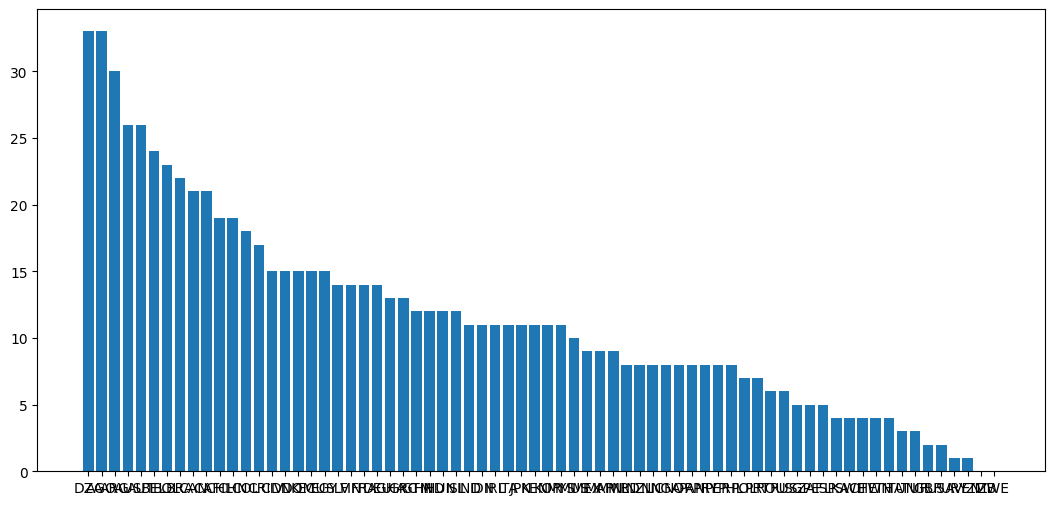

In [11]:
plt.figure(figsize=(13,6))
plt.bar(countries, results['banking_crisis_number'])

In [12]:
results.describe().round(1)

,banking_crisis_number
count,70.0
mean,11.5
std,7.6
min,0.0
25%,6.2
50%,11.0
75%,15.0
max,33.0


In [13]:
print(results.tail())
print(results.head())

             banking_crisis_number
Country                           
Panama                           2
Singapore                        1
Mauritius                        1
Switzerland                      0
Ireland                          0
                banking_crisis_number
Country                              
United States                      33
United Kingdom                     33
Spain                              30
France                             26
Italy                              26


## 1.2 Get the number of negative liquidity shock per country

### 1.2.1 Number of episode of deflation crisis

In [14]:
data['crisis_and_deflation'] = ((data['banking_crisis'] == 1) | (data['systemic_crisis'] == 1)) & (data['annual_inflation'] < 0)
deflations_crisis = data.groupby('Country')['crisis_and_deflation'].sum().astype(int)
deflations_crisis.sort_values(ascending = False, inplace = True)

In [15]:
deflations_crisis.describe().round(1)

count    70.0
mean      2.3
std       3.4
min       0.0
25%       0.0
50%       0.5
75%       4.0
max      14.0
Name: crisis_and_deflation, dtype: float64

### 1.2.3 Frequency of a negative demand shock from every year of the dataset

In [16]:
frequency = (deflations_crisis / nb_observations).round(2)
deflation = pd.DataFrame({'deflation episode' : deflations_crisis,
                          'frequency_deflation' : frequency})
deflation.sort_values(by ='deflation episode', ascending=False, inplace=True)

In [17]:
deflation['deflation episode'].mean()

2.342857142857143

In [18]:
countries_a = deflation.index[deflation['deflation episode']==2].tolist()
countries_a

['Taiwan', 'Canada', 'Ireland']

In [19]:
countries_b = deflation.index[deflation['deflation episode']==3].tolist()
countries_b

['Italy', 'Poland', 'Russia', 'Austria', 'Argentina', 'Hungary']

In [20]:
countries_c = deflation.head().index.tolist()
countries_c

['United States', 'United Kingdom', 'Japan', 'Sweden', 'France']

# 2. Look for specific negative demand shock episode

### 2.1 Focus on the USA (type c)

In [21]:
USA_data = data[data["CC3"]=='USA']

(-50.0, 50.0)

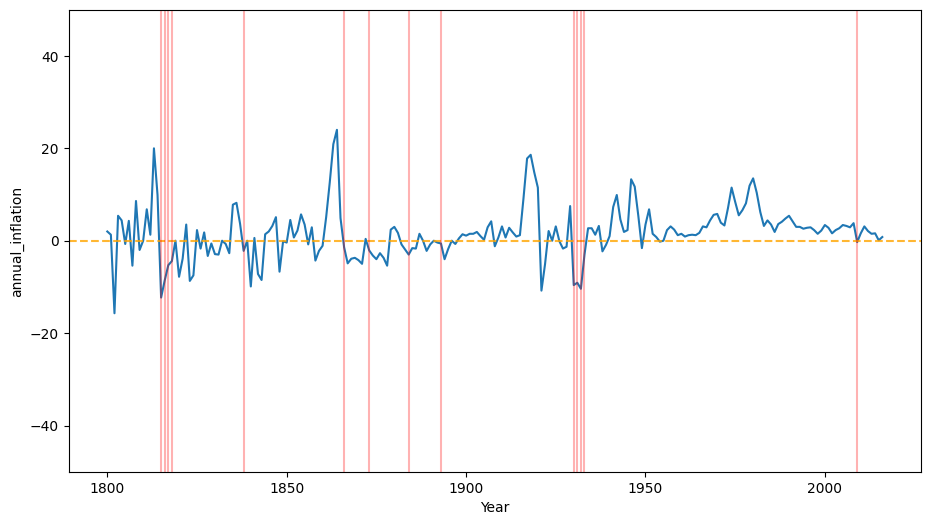

In [22]:
plt.figure(figsize=(11,6))
sns.lineplot(x=USA_data['Year'], y=USA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = USA_data[USA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.2 Focus on Italy (type b)

In [23]:
ITA_data = data[data["CC3"]=='ITA']

(-50.0, 50.0)

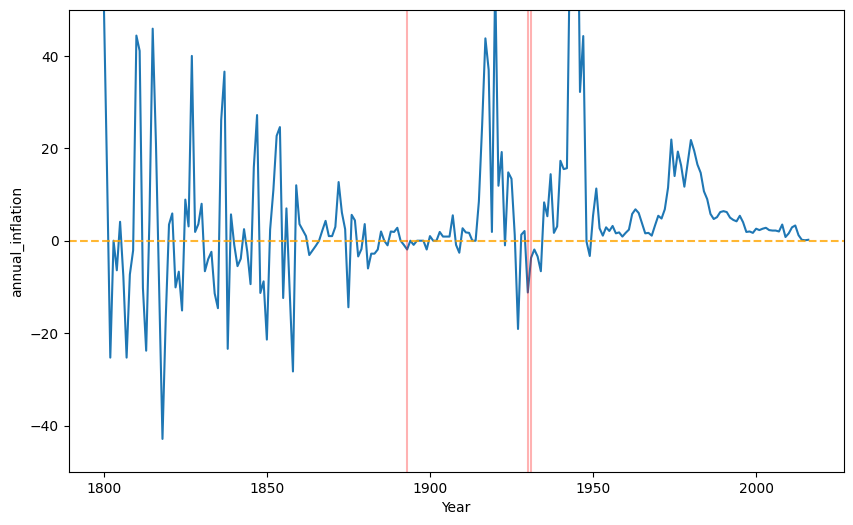

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x=ITA_data['Year'], y=ITA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = ITA_data[ITA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.3 Focus on Finland (type a)

In [25]:
FIN_data = data[data["CC3"]=='FIN']

(-50.0, 50.0)

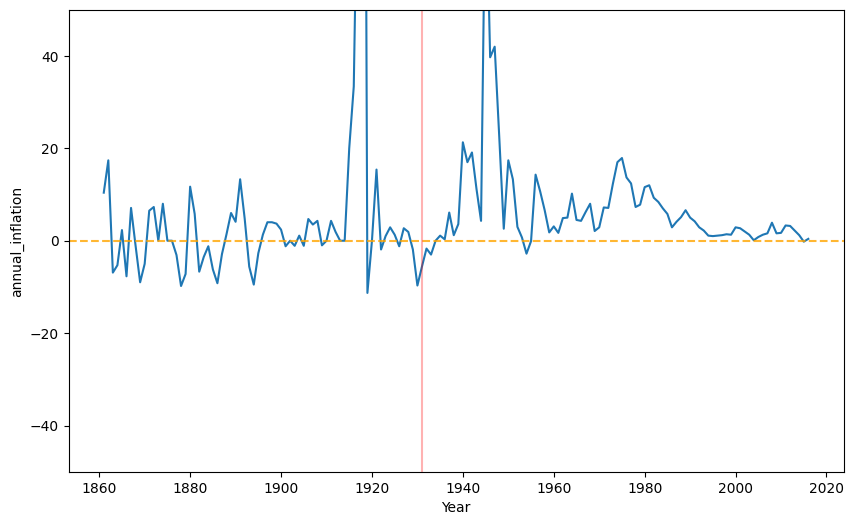

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x=FIN_data['Year'], y=FIN_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0',linestyle = 'dashed', alpha = 0.8)
crisis_years = FIN_data[FIN_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.4 Focus on Japan (type c) 

In [27]:
JPN_data = data[data["CC3"]=='JPN']

(-50.0, 50.0)

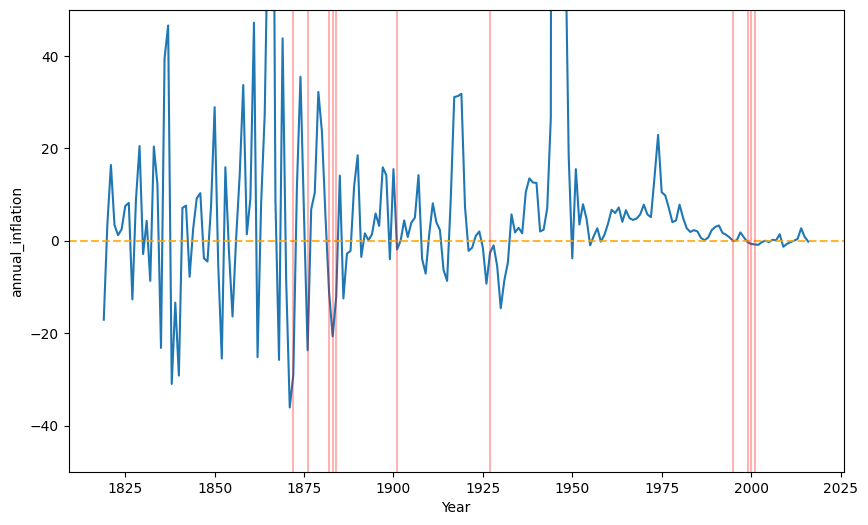

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x=JPN_data['Year'], y=JPN_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0',linestyle = 'dashed', alpha = 0.8)
crisis_years = JPN_data[JPN_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.5 Focus on France

In [29]:
FRA_data = data[data["CC3"]=='FRA']

(-50.0, 50.0)

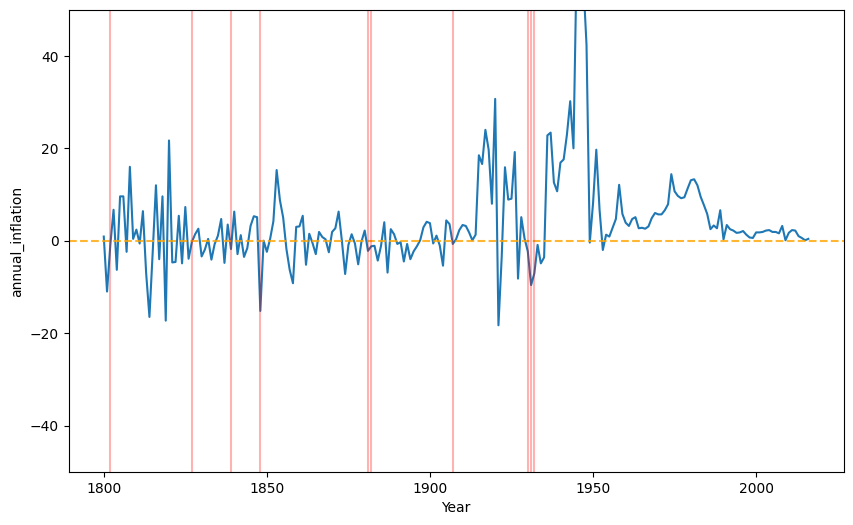

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x=FRA_data['Year'], y=FRA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = FRA_data[FRA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.6. Focus on Argentina

In [31]:
ARG_data = data[data["CC3"]=='ARG']

(-50.0, 50.0)

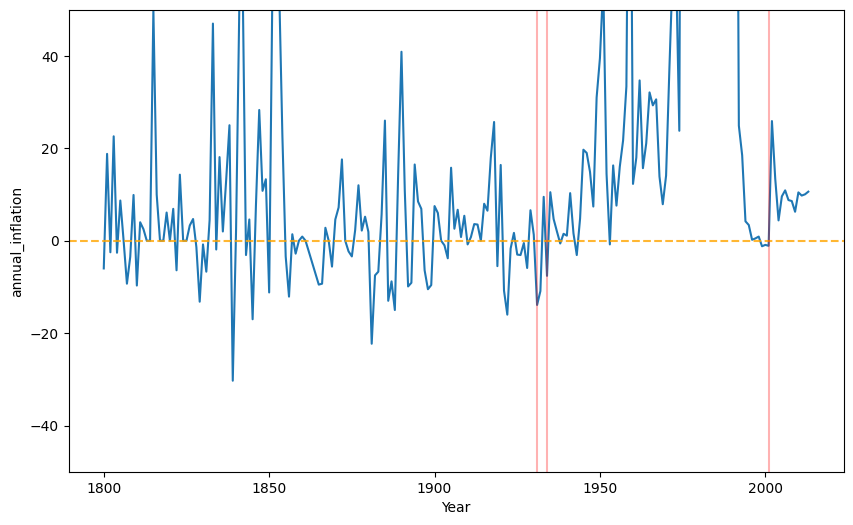

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x=ARG_data['Year'], y=ARG_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = ARG_data[ARG_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

# 3. Focus on a crisis: The great Depression

- From the initial Dataset

In [33]:
selected_countries = ['USA', 'JPN', 'FRA', 'ITA', 'ARG']

In [34]:
great_depression = data[(data['Year']>=1928) & (data['Year']<=1940)][['Year', 'annual_inflation', 'Country', 'CC3', 'crisis_and_deflation']]
df = great_depression[great_depression['CC3'].isin(selected_countries)]

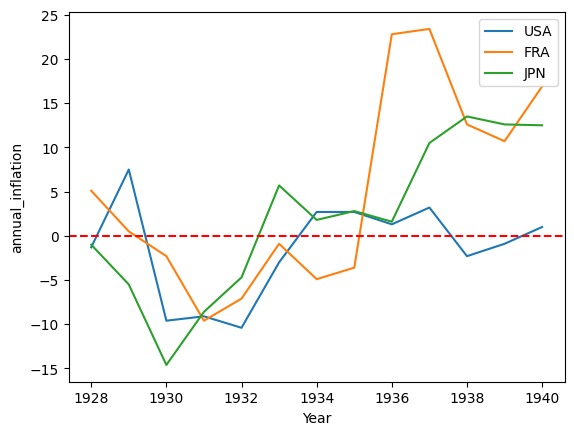

In [35]:
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='USA'], label = 'USA')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='FRA'], label = 'FRA')
# sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ITA'], label = 'ITA')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='JPN'], label = 'JPN')
plt.axhline(y=0, color='red',linestyle='--')
plt.legend()

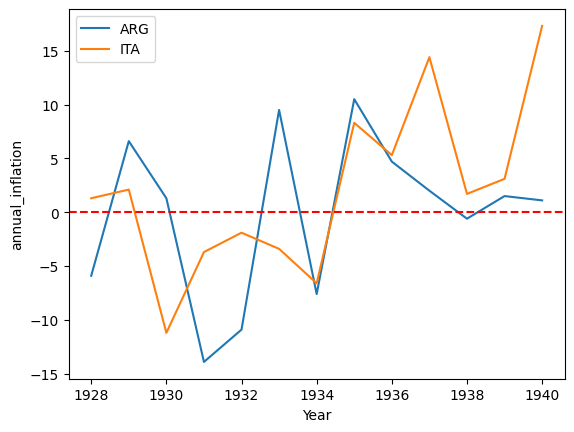

In [36]:
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ARG'], label = 'ARG')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ITA'], label = 'ITA')
plt.axhline(y=0, color='red',linestyle='--')
plt.legend()

- from a more precise quaterly dataset

In [37]:
USA_CPI = pd.read_csv('../raw_data/USA/USA_CPI.csv')

# 4. Estimating the average pattern of response to liquidity shock - focus on the USA

In [38]:
USA_data.head()

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,sovereign_external_debt_1,sovereign_external_debt_2,Defaults_External_Notes,GDP_Weighted_default,<,annual_inflation,Independence,Currency Crises,Inflation Crises,crisis_and_deflation
14106,66.0,USA,United States,1800,0.0,NaN,0.0,0,4.462293619,NaN,...,0,0.0,NaN,0,1,2.0,1,0,0,False
14107,66.0,USA,United States,1801,0.0,NaN,0.0,0,4.363001745,NaN,...,0,0.0,NaN,0,0,1.3,1,0,0,False
14108,66.0,USA,United States,1802,0.0,NaN,0.0,0,4.474272931,NaN,...,0,0.0,NaN,0,0,-15.7,1,0,0,False
14109,66.0,USA,United States,1803,0.0,NaN,0.0,0,4.662004662,NaN,...,0,0.0,NaN,0,0,5.4,1,0,0,False
14110,66.0,USA,United States,1804,0.0,NaN,0.0,0,4.528985507,NaN,...,0,0.0,NaN,0,0,4.4,1,0,0,False


In [39]:
banking_crisis_years = USA_data[USA_data['banking_crisis'] == 1]['Year'].tolist()
len(banking_crisis_years)

33

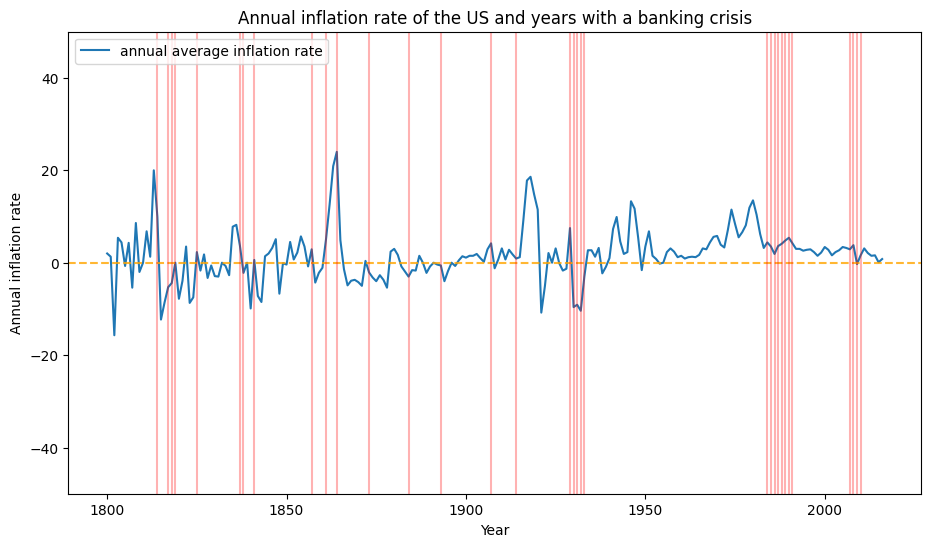

In [40]:
plt.figure(figsize=(11,6))

sns.lineplot(x=USA_data['Year'], y=USA_data['annual_inflation'], label = 'annual average inflation rate')

plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)

for year in banking_crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)

plt.ylim(-50, 50)

plt.title('Annual inflation rate of the US and years with a banking crisis')
plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

plt.savefig('../figures/banking_crisis_overview.png')

plt.show()

### 4.0 Defining functions to plot the data

In [41]:
def extract_inflation_series(data, target_year):
    target_index = data[data['Year'] == target_year].index[0]
    series = data.loc[target_index-1:target_index+6, 'annual_inflation']
    return np.array(series)

In [42]:
years = []
for i in range (-1,7):
    if i<0:
        years.append(f"t{i}")
    elif i==0:
        years.append(f"t")
    else:
        years.append(f"t+{i}")
years


['t-1', 't', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6']

### 4.1 Treat each year of crises as an individual event

In [43]:
inflation_series_all = []
for year in banking_crisis_years:
    inflation_series_all.append(extract_inflation_series(USA_data, year))
inflation_series_all = np.array(inflation_series_all)

In [44]:
norm_inflation_series_all = []
for array in inflation_series_all:
    norm_inflation_series_all.append(array - array[0])
norm_inflation_series_all = np.array(norm_inflation_series_all)

In [45]:
average_pattern = np.mean(norm_inflation_series_all, axis=0)
confidence_interval = 1.96 * np.std(norm_inflation_series_all, axis=0) / np.sqrt(norm_inflation_series_all.shape[0])

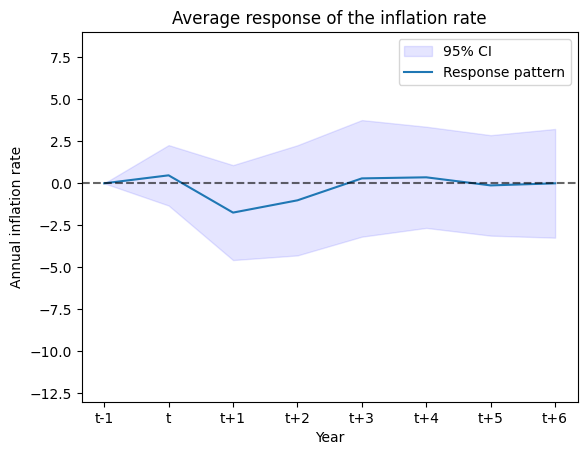

In [46]:
plt.title('Average response of the inflation rate')
plt.fill_between(
    range(len(average_pattern)),
    average_pattern - confidence_interval,
    average_pattern + confidence_interval,
    color='blue',
    alpha=0.1, label='95% CI'
)

sns.lineplot(x=years, y=average_pattern, label = 'Response pattern')
plt.axhline(y=0, color='black', label='y=0', linestyle = 'dashed', alpha = 0.6)

plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

plt.ylim(-13,9)
plt.show()

### 4.2 Count only the beginning of the crises and treat the series as one event

In [47]:
banking_crisis_first_year = [banking_crisis_years[0]]
for i in range (1, len(banking_crisis_years)):
    if banking_crisis_years[i]-banking_crisis_years[i-1]>=3:
        banking_crisis_first_year.append(banking_crisis_years[i])
len(banking_crisis_first_year)

16

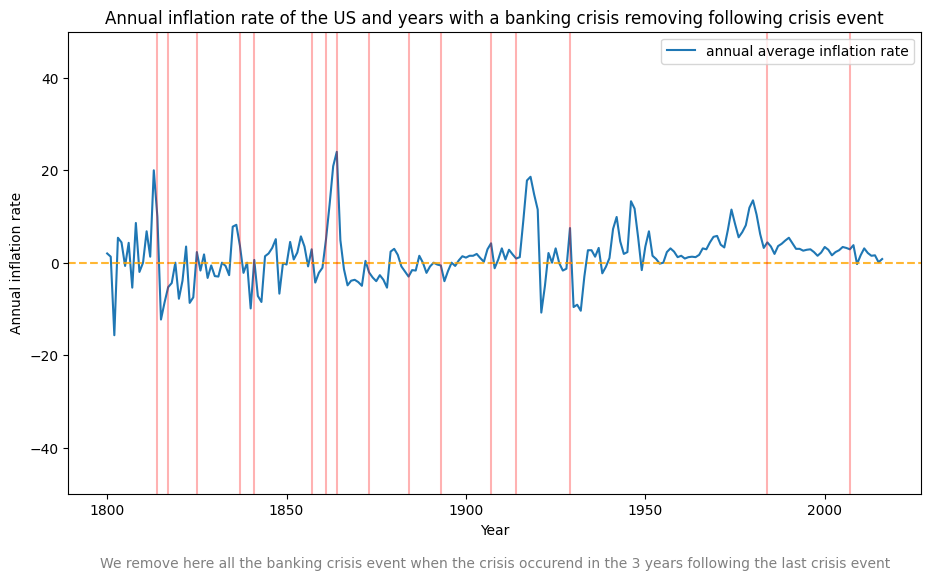

In [48]:
plt.figure(figsize=(11,6))

sns.lineplot(x=USA_data['Year'], y=USA_data['annual_inflation'], label = 'annual average inflation rate')
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)

for year in banking_crisis_first_year:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)

plt.ylim(-50, 50)

plt.title('Annual inflation rate of the US and years with a banking crisis removing following crisis event')
plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

subtitle_text = "We remove here all the banking crisis event when the crisis occurend in the 3 years following the last crisis event"
plt.annotate(subtitle_text,
             xy=(0.5, -0.15),  # Position of the text (relative to the plot)
             xycoords='axes fraction',
             ha='center', va='center',  # Centered text
             fontsize=10,
             color='gray')

plt.show()

In [49]:
inflation_series = []
for year in banking_crisis_first_year:
    series_for_year = extract_inflation_series(USA_data, year)
    inflation_series.append(series_for_year)
inflation_series = np.array(inflation_series)

In [50]:
norm_inflation_series = []
for array in inflation_series:
    norm_inflation_series.append(array - array[0])
norm_inflation_series = np.array(norm_inflation_series)

In [51]:
len(norm_inflation_series)

16

In [52]:
average_pattern = np.mean(norm_inflation_series, axis=0)
confidence_interval = 1.96 * np.std(norm_inflation_series, axis=0) / np.sqrt(norm_inflation_series.shape[0])

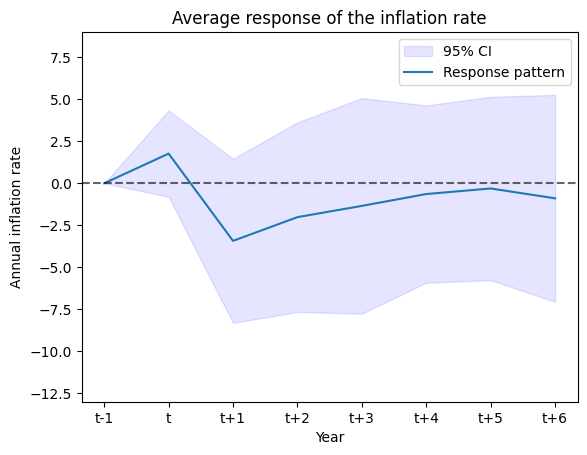

In [53]:
plt.fill_between(
    range(len(average_pattern)),
    average_pattern - confidence_interval,
    average_pattern + confidence_interval,
    color='blue',
    alpha=0.1, label='95% CI'
)

sns.lineplot(x=years, y=average_pattern, label = 'Response pattern')
plt.axhline(y=0, color='black', label='y=0', linestyle = 'dashed', alpha = 0.6)

plt.title('Average response of the inflation rate')
plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

plt.ylim(-13,9)
plt.show()

### 4.3 Count only the beginning of the crises and treat the series as one event with adding a larger weight on a multi-year crisis

In [64]:
crisis_duration = [1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 8, 4]
len(crisis_duration)

16

In [77]:
norm_inflation_series.shape[1]

8

In [95]:
weighted_average_pattern = np.average(norm_inflation_series, axis=0, weights=crisis_duration)
weighted_std = np.sqrt(np.average((norm_inflation_series - weighted_average_pattern)**2, axis=0, weights=crisis_duration))
weighted_confidence_interval = 1.96 * weighted_std / np.sqrt(sum(crisis_duration))

# num_samples = 1000

# # Function to compute the weighted average
# def weighted_average(data, weights):
#     return np.average(data, axis=0, weights=weights)

# crisis_duration = np.array(crisis_duration)

# # Bootstrap sampling
# bootstrap_samples = np.zeros((num_samples, norm_inflation_series.shape[1]))
# for i in range(num_samples):
#     indices = np.random.choice(range(norm_inflation_series.shape[0]), size=norm_inflation_series.shape[0], replace=True)
#     bootstrap_weights = crisis_duration[indices]
#     bootstrap_samples[i, :] = weighted_average(norm_inflation_series[indices, :], bootstrap_weights)

# # Compute the 95% confidence interval
# a_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5], axis=0)

# print("Weighted Average:", weighted_average(norm_inflation_series, crisis_duration))
# print("95% Confidence Interval:", a_confidence_interval)

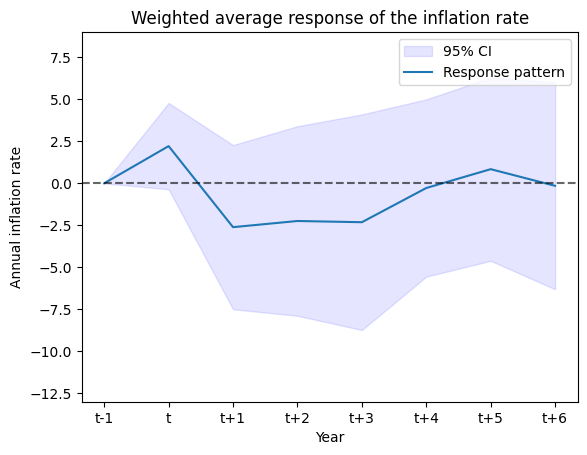

In [102]:
plt.fill_between(
    range(len(weighted_average_pattern)),
    weighted_average_pattern - confidence_interval,
    weighted_average_pattern + confidence_interval,
    color='blue',
    alpha=0.1, label='95% CI'
)

sns.lineplot(x=years, y=weighted_average_pattern, label = 'Response pattern')
plt.axhline(y=0, color='black', label='y=0', linestyle = 'dashed', alpha = 0.6)

plt.title('Weighted average response of the inflation rate')
plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

plt.ylim(-13,9)
plt.show()

### 4.4 Focus on specific crisis

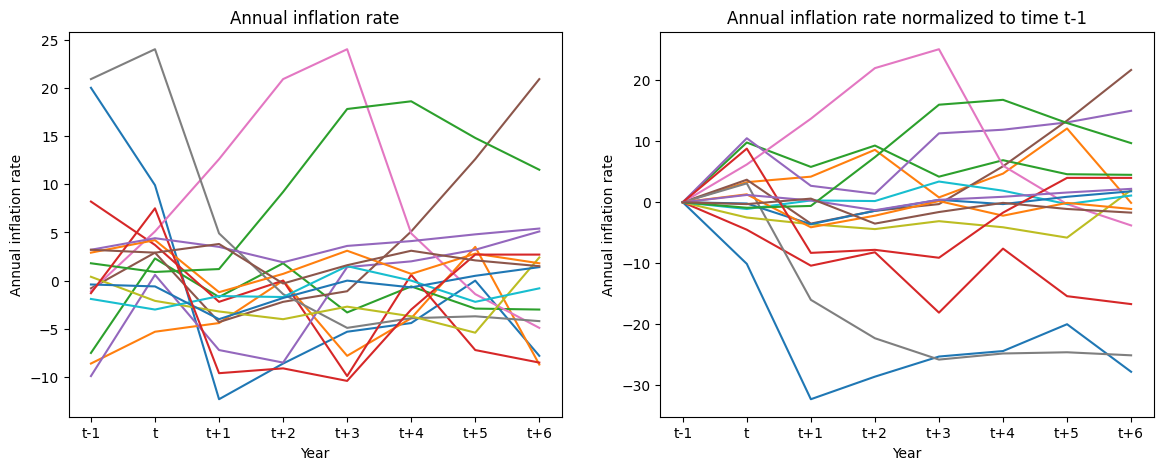

In [55]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Annual inflation rate')
for i in range (0,len(inflation_series)):
    sns.lineplot(x=years, y=inflation_series[i])
plt.xlabel('Year')
plt.ylabel('Annual inflation rate')


plt.subplot(1, 2, 2)
plt.title('Annual inflation rate normalized to time t-1')
for i in range (0,len(norm_inflation_series)):
    sns.lineplot(x=years, y=norm_inflation_series[i])

plt.xlabel('Year')
plt.ylabel('Annual inflation rate')

plt.show()

In [97]:
crisis_dict = {}
for key, value in zip(banking_crisis_first_year,inflation_series):
    crisis_dict[f"Crisis of {key}"]=value

In [98]:
keys_to_remove = ['Crisis of 1825', 'Crisis of 1837', 'Crisis of 1857','Crisis of 1884','Crisis of 1907','Crisis of 1914' ]
sample_crisis = {key: value for key, value in crisis_dict.items() if key not in keys_to_remove}

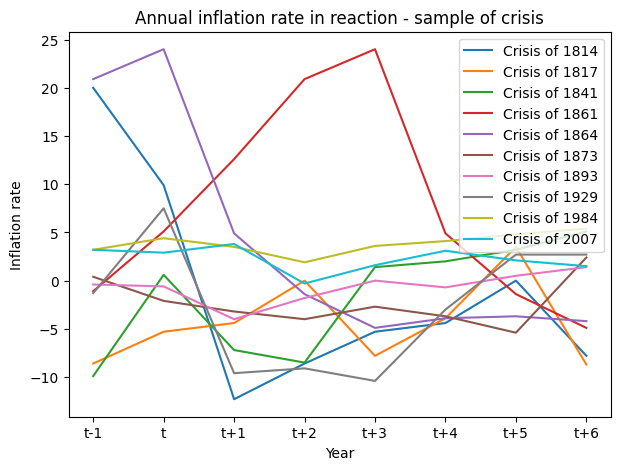

In [101]:
plt.figure(figsize=(7,5))

for key,value in sample_crisis.items():
    sns.lineplot(x=years, y=value, label=key)
plt.title('Annual inflation rate in reaction - sample of crisis')

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Inflation rate')

plt.savefig('../figures/crisis_sample.png')

plt.show()

# 5. Learning Process

In [123]:
USA_data['cum_crisis'] = USA_data['banking_crisis'].cumsum()
USA_data['row_number'] = range(1, len(USA_data) + 1)
USA_data['cum_crisis_proba'] = USA_data['cum_crisis']/USA_data['row_number']

/tmp/ipykernel_63354/2671063860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_data['cum_crisis'] = USA_data['banking_crisis'].cumsum()
/tmp/ipykernel_63354/2671063860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_data['row_number'] = range(1, len(USA_data) + 1)
/tmp/ipykernel_63354/2671063860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

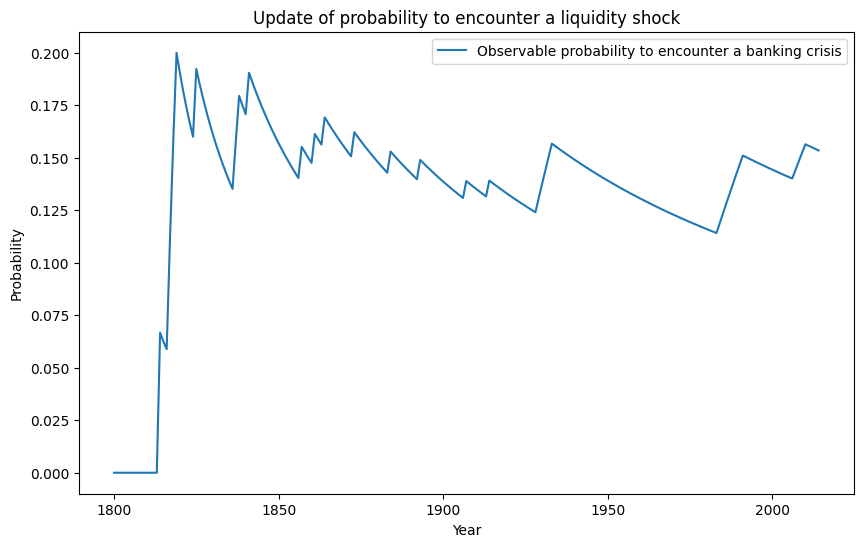

In [129]:
plt.figure(figsize=(10,6))

sns.lineplot(x=USA_data['Year'], y=USA_data['cum_crisis_proba'], label = 'Observable probability to encounter a banking crisis')

plt.title('Update of probability to encounter a liquidity shock')

plt.xlabel('Year')
plt.ylabel('Probability')
plt.legend()